**Atualizando a biblioteca para plotagem de gráficos**


In [ ]:
!pip -q install plotly --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 38.7 MB/s eta 0:00:00


**Importando bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Abrindo um arquivo CSV do drive**

In [4]:
base = pd.read_csv('train.csv', sep=',')

**Você também pode carregar seu arquivo e já selecionar as colunas que desejar... investigue esta função**

In [ ]:
#base2 = pd.read_csv('/content/sample_data/restaurante_correto.csv', ';', usecols=['Alternativo', 'Bar'])
#base2

In [5]:
base

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Contando quantidade de instâncias**


In [11]:
Classificação = base.columns[1]
np.unique(base[Classificação], return_counts=True)

(array([0, 1]), array([549, 342]))

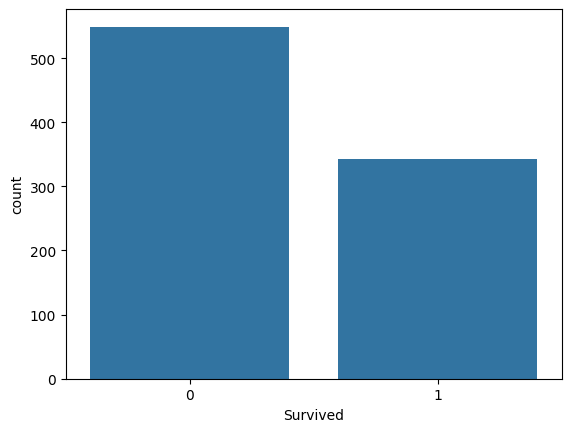

In [12]:
sns.countplot(x = base[Classificação]);

In [81]:
base_1 = base.drop(columns=['PassengerId','Name', 'Ticket','Fare','Cabin','SibSp','Parch'])
base_1.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S


**Tratamento de dados categóricos**

> *LabelEncoder - Vamos tratar os dados categóricos colocando 1, 2, 3 e etc**



In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
#para codificar todos os atributos para laberEncoder de uma única vez
#base_encoded = base.apply(LabelEncoder().fit_transform)
encoder = LabelEncoder()

# Aplicando no atributo 'Sex'
base_1['Sex'] = encoder.fit_transform(base_1['Sex'])


In [84]:
base_1

,Survived,Pclass,Sex,Age,Embarked
0,0,3,1,22.0,S
1,1,1,0,38.0,C
2,1,3,0,26.0,S
3,1,1,0,35.0,S
4,0,3,1,35.0,S
...,...,...,...,...,...
886,0,2,1,27.0,S
887,1,1,0,19.0,S
888,0,3,0,NaN,S
889,1,1,1,26.0,C




>** OneHotEncoder - Agora vamos binarizar atributos não ordinais**

**Contando quantas opções de resposta tem cada atributo**

In [113]:
len(np.unique(base_1['Embarked'].astype(str)))

4

In [114]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [115]:
cols_onehot_encode = ['Embarked']
# Inicializar o OneHotEncoder (sparse_output=False retorna um array denso)
onehot = OneHotEncoder(sparse_output=False)

# Aplicar o OneHotEncoder apenas nas colunas categóricas
base_onehot = onehot.fit_transform(base_1[cols_onehot_encode])

# Obter os novos nomes das colunas após a codificação
nomes_das_colunas = onehot.get_feature_names_out(cols_onehot_encode)

# Criar um DataFrame com os dados codificados e as novas colunas
df_onehot = pd.DataFrame(base_onehot, columns=nomes_das_colunas)

# Combinar as colunas codificadas com as colunas que não foram transformadas
base_encoded= pd.concat([df_onehot, base_1.drop(columns=cols_onehot_encode)], axis=1)

In [116]:
base_encoded

,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Survived,Pclass,Sex,Age
0,0.0,0.0,1.0,0.0,0,3,1,22.0
1,1.0,0.0,0.0,0.0,1,1,0,38.0
2,0.0,0.0,1.0,0.0,1,3,0,26.0
3,0.0,0.0,1.0,0.0,1,1,0,35.0
4,0.0,0.0,1.0,0.0,0,3,1,35.0
...,...,...,...,...,...,...,...,...
886,0.0,0.0,1.0,0.0,0,2,1,27.0
887,0.0,0.0,1.0,0.0,1,1,0,19.0
888,0.0,0.0,1.0,0.0,0,3,0,NaN
889,1.0,0.0,0.0,0.0,1,1,1,26.0


In [117]:
base_encoded.shape

(891, 8)

**Separar o dataset em variáveis independentes (X_prev) e dependentes (y_classe)**

In [119]:
X_prev = base_encoded.drop(columns=['Survived'])
y_classe = base_encoded.iloc[:,4]

**Método de amostragem Holdout**

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_prev

,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Pclass,Sex,Age
0,0.0,0.0,1.0,0.0,3,1,22.0
1,1.0,0.0,0.0,0.0,1,0,38.0
2,0.0,0.0,1.0,0.0,3,0,26.0
3,0.0,0.0,1.0,0.0,1,0,35.0
4,0.0,0.0,1.0,0.0,3,1,35.0
...,...,...,...,...,...,...,...
886,0.0,0.0,1.0,0.0,2,1,27.0
887,0.0,0.0,1.0,0.0,1,0,19.0
888,0.0,0.0,1.0,0.0,3,0,NaN
889,1.0,0.0,0.0,0.0,1,1,26.0


In [122]:
y_classe

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [123]:
y_classe.shape

(891,)

In [124]:
#X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True, stratify=y)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 42)

In [125]:
X_treino.shape

(712, 7)

In [127]:
X_teste.shape

(179, 7)

In [128]:
X_teste

,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Pclass,Sex,Age
709,1.0,0.0,0.0,0.0,3,1,NaN
439,0.0,0.0,1.0,0.0,2,1,31.0
840,0.0,0.0,1.0,0.0,3,1,20.0
720,0.0,0.0,1.0,0.0,2,0,6.0
39,1.0,0.0,0.0,0.0,3,0,14.0
...,...,...,...,...,...,...,...
433,0.0,0.0,1.0,0.0,3,1,17.0
773,1.0,0.0,0.0,0.0,3,1,NaN
25,0.0,0.0,1.0,0.0,3,0,38.0
84,0.0,0.0,1.0,0.0,2,0,17.0


In [108]:
y_treino

,Survived
331,0
733,0
382,0
704,0
813,0
...,...
106,1
270,0
860,0
435,1


In [109]:
y_teste

,Survived
709,1
439,0
840,0
720,1
39,1
...,...
433,0
773,0
25,1
84,1


In [110]:
import pickle

In [112]:
with open('/content/sample_data/Titanic.pkl', mode = 'wb') as f:
  pickle.dump([X_treino, X_teste, y_treino, y_teste], f)